In [ ]:
## 统计伽马暴、引力波等ToO事件

In [6]:
import math

import numpy as np
import pandas as pd
import pandas as po

df = pd.read_csv('./data/Fermi1.csv',encoding='utf-8')
df


,TrigNum,Date,Time UT,MesgType,RA,Dec,Error,Comments
0,693644339,2022/12/25,6:58:54,GBM Flight Position,153.600,47.633,50.00,Fermi-GBM Flight-calculated Coordinates. This ...
1,693644339,2022/12/25,6:58:54,GBM Flight Position,121.967,37.183,50.00,Fermi-GBM Flight-calculated Coordinates. This ...
2,693552502,2022/12/24,5:28:18,GBM Flight Position,33.433,-35.733,3.70,Fermi-GBM Flight-calculated Coordinates. This ...
3,693552502,2022/12/24,5:28:18,GBM Flight Position,36.633,-35.633,3.95,Fermi-GBM Flight-calculated Coordinates. This ...
4,693552502,2022/12/24,5:28:18,GBM Ground Position,6.240,11.220,2.34,Fermi-GBM Ground-calculated Coordinates. This ...
...,...,...,...,...,...,...,...,...
7725,526502501,2017/9/7,18:41:36,GBM Flight Position,157.267,10.083,19.70,Fermi-GBM Flight-calculated Coordinates. This ...
7726,526488497,2017/9/7,14:48:12,GBM Flight Position,173.067,12.783,8.65,Fermi-GBM Flight-calculated Coordinates. This ...
7727,526488497,2017/9/7,14:48:12,GBM Flight Position,169.333,16.183,13.33,Fermi-GBM Flight-calculated Coordinates. This ...
7728,526472211,2017/9/7,10:16:46,GBM Flight Position,139.317,25.600,14.07,Fermi-GBM Flight-calculated Coordinates. This ...


In [7]:
df[df['Error']>=0]

,TrigNum,Date,Time UT,MesgType,RA,Dec,Error,Comments
0,693644339,2022/12/25,6:58:54,GBM Flight Position,153.600,47.633,50.00,Fermi-GBM Flight-calculated Coordinates. This ...
1,693644339,2022/12/25,6:58:54,GBM Flight Position,121.967,37.183,50.00,Fermi-GBM Flight-calculated Coordinates. This ...
2,693552502,2022/12/24,5:28:18,GBM Flight Position,33.433,-35.733,3.70,Fermi-GBM Flight-calculated Coordinates. This ...
3,693552502,2022/12/24,5:28:18,GBM Flight Position,36.633,-35.633,3.95,Fermi-GBM Flight-calculated Coordinates. This ...
4,693552502,2022/12/24,5:28:18,GBM Ground Position,6.240,11.220,2.34,Fermi-GBM Ground-calculated Coordinates. This ...
...,...,...,...,...,...,...,...,...
7725,526502501,2017/9/7,18:41:36,GBM Flight Position,157.267,10.083,19.70,Fermi-GBM Flight-calculated Coordinates. This ...
7726,526488497,2017/9/7,14:48:12,GBM Flight Position,173.067,12.783,8.65,Fermi-GBM Flight-calculated Coordinates. This ...
7727,526488497,2017/9/7,14:48:12,GBM Flight Position,169.333,16.183,13.33,Fermi-GBM Flight-calculated Coordinates. This ...
7728,526472211,2017/9/7,10:16:46,GBM Flight Position,139.317,25.600,14.07,Fermi-GBM Flight-calculated Coordinates. This ...


In [8]:
import datetime
df['Date']=df["Date"].astype('datetime64[ns]')  #如果已为日期格式则此步骤可省略
df['Date']
# s_date = datetime.datetime.strptime('2020-04-30', '%Y-%m-%d').date()  #起始日期
# e_date = datetime.datetime.strptime('2020-06-01', '%Y-%m-%d').date()  #结束日期

0      2022-12-25
1      2022-12-25
2      2022-12-24
3      2022-12-24
4      2022-12-24
          ...    
7725   2017-09-07
7726   2017-09-07
7727   2017-09-07
7728   2017-09-07
7729   2017-09-07
Name: Date, Length: 7730, dtype: datetime64[ns]

In [9]:
df2 = df[(df['Date']>='2021-01-01')& (df['Date']<='2021-12-31')]
df2

,TrigNum,Date,Time UT,MesgType,RA,Dec,Error,Comments
1594,662626836,2021-12-31,7:00:32,GBM Final Position,292.170,-24.920,1.76,Fermi-GBM Final Position. This Notice was grou...
1595,662626836,2021-12-31,7:00:32,GBM Ground Position,289.570,-17.280,2.02,Fermi-GBM Ground-calculated Coordinates. This ...
1596,662626836,2021-12-31,7:00:32,GBM Ground Position,292.070,-16.330,4.26,Fermi-GBM Ground-calculated Coordinates. This ...
1597,662626836,2021-12-31,7:00:32,GBM Flight Position,292.000,-16.333,5.38,Fermi-GBM Flight-calculated Coordinates. This ...
1598,662626836,2021-12-31,7:00:32,GBM Flight Position,282.400,-13.383,22.92,Fermi-GBM Flight-calculated Coordinates. This ...
...,...,...,...,...,...,...,...,...
2839,631205591,2021-01-01,14:53:07,GBM Final Position,136.700,50.100,4.56,Fermi-GBM Final Position. This Notice was grou...
2840,631205591,2021-01-01,14:53:07,GBM Ground Position,148.320,27.230,8.14,Fermi-GBM Ground-calculated Coordinates. This ...
2841,631205591,2021-01-01,14:53:07,GBM Flight Position,150.533,51.833,8.78,Fermi-GBM Flight-calculated Coordinates. The L...
2842,631205591,2021-01-01,14:53:07,GBM Ground Position,146.880,29.110,8.54,Fermi-GBM Ground-calculated Coordinates. This ...


In [10]:
df2 = df2.sort_values(by='Error')
df2

,TrigNum,Date,Time UT,MesgType,RA,Dec,Error,Comments
1850,656315976,2021-10-19,5:59:31,GBM Final Position,109.560,-39.190,1.0,Fermi-GBM Final Position. This Notice was grou...
2026,652927551,2021-09-10,0:45:47,GBM Final Position,301.700,17.760,1.0,Fermi-GBM Final Position. This Notice was grou...
2027,652927551,2021-09-10,0:45:47,GBM Ground Position,301.710,17.780,1.0,Fermi-GBM Ground-calculated Coordinates. This ...
2648,638308803,2021-03-24,19:59:58,GBM Ground Position,39.170,-45.250,1.0,Fermi-GBM Ground-calculated Coordinates. In th...
2028,652927551,2021-09-10,0:45:47,GBM Ground Position,301.710,17.780,1.0,Fermi-GBM Ground-calculated Coordinates. This ...
...,...,...,...,...,...,...,...,...
1749,658710179,2021-11-15,23:02:55,GBM Flight Position,192.950,77.383,50.0,Fermi-GBM Flight-calculated Coordinates. This ...
1809,657502760,2021-11-01,23:39:15,GBM Flight Position,172.383,18.233,50.0,Fermi-GBM Flight-calculated Coordinates. This ...
2584,640303939,2021-04-16,22:12:15,GBM Flight Position,271.300,-43.833,50.0,Fermi-GBM Flight-calculated Coordinates. This ...
1790,657707352,2021-11-04,8:29:08,GBM Flight Position,63.983,78.233,50.0,Fermi-GBM Flight-calculated Coordinates. This ...


In [11]:
# df2['TrigNum'].duplicated()
df2.drop_duplicates('TrigNum',keep='first',inplace=True)
df2 = df2.sort_values(by='Date')
df2

,TrigNum,Date,Time UT,MesgType,RA,Dec,Error,Comments
2839,631205591,2021-01-01,14:53:07,GBM Final Position,136.700,50.100,4.56,Fermi-GBM Final Position. This Notice was grou...
2838,631226368,2021-01-01,20:39:24,GBM Final Position,10.300,-6.910,5.18,Fermi-GBM Final Position. This Notice was grou...
2833,631312759,2021-01-02,20:39:14,GBM Ground Position,232.700,-27.540,2.55,Fermi-GBM Ground-calculated Coordinates. This ...
2827,631452424,2021-01-04,11:27:00,GBM Ground Position,110.770,68.720,2.53,Fermi-GBM Ground-calculated Coordinates. This ...
2822,631555390,2021-01-05,16:03:06,GBM Final Position,70.990,-36.830,9.61,Fermi-GBM Final Position. This Notice was grou...
...,...,...,...,...,...,...,...,...
1606,662163745,2021-12-25,22:22:20,GBM Flight Position,139.200,58.983,32.70,Fermi-GBM Flight-calculated Coordinates. This ...
1605,662216114,2021-12-26,12:55:10,GBM Flight Position,293.683,13.450,26.30,Fermi-GBM Flight-calculated Coordinates. This ...
1599,662509128,2021-12-29,22:18:43,GBM Final Position,185.000,-18.420,1.09,Fermi-GBM Final Position. This Notice was grou...
1601,662441360,2021-12-29,3:29:16,GBM Final Position,294.980,22.910,3.74,Fermi-GBM Final Position. This Notice was grou...


In [12]:
df2 = df2.reset_index(drop=True)
df2.to_csv('Fermi2021.csv')

In [78]:
#####INTEGRAL

In [22]:
df = pd.read_csv('./data/integral.csv')
df

,"Trig,SubNums",Date,Time UT,Mesg,RA,Dec,Error,Inten,Comments
0,"10135,0",2022/12/24,15:16:05,Weak,301.8998,27.0442,3.77,6.12,INTEGRAL GRB Coordinates -- this is the weak/s...
1,"10134,0",2022/12/21,17:18:12,Weak,193.0915,-50.4543,3.58,6.74,INTEGRAL GRB Coordinates -- this is the weak/s...
2,"10133,0",2022/12/18,9:49:49,Weak,357.6972,-7.9894,3.52,6.97,INTEGRAL GRB Coordinates -- this is the weak/s...
3,"10132,3",2022/12/18,8:15:52,Offline,350.6500,-4.2607,3.00,22.35,INTEGRAL GRB Coordinates. Time_Scale=50.0000 a...
4,"10132,2",2022/12/18,8:15:52,Refine,350.6500,-4.2607,2.62,22.35,INTEGRAL GRB Coordinates. Time_Scale=50.0000 a...
...,...,...,...,...,...,...,...,...,...
2892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2894,This file is continuously modified by the gcn ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df = df[df['Error']>=0]

In [24]:
df['Date']=df["Date"].astype('datetime64[ns]')  #如果已为日期格式则此步骤可省略

/var/folders/w0/pdcqgg7107b13rvwb56gsrlc0000gn/T/ipykernel_97954/1588970410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df["Date"].astype('datetime64[ns]')  #如果已为日期格式则此步骤可省略


In [25]:
df2 = df[(df['Date']>='2021/01/01') & (df['Date']<='2021/12/31')]
df2 = df2.reset_index(drop=True)
df2['Trig'] = df2['Trig,SubNums']
df2

,"Trig,SubNums",Date,Time UT,Mesg,RA,Dec,Error,Inten,Comments,Trig
0,"9584,0",2021-12-30,13:43:49,Weak,220.5780,-53.3588,3.78,6.08,INTEGRAL GRB Coordinates -- this is the weak/s...,"9584,0"
1,"9583,0",2021-12-30,13:11:12,Weak,223.9821,-50.6995,3.85,5.92,INTEGRAL GRB Coordinates -- this is the weak/s...,"9583,0"
2,"9582,0",2021-12-30,11:37:07,Weak,156.1291,-54.8296,3.77,6.16,INTEGRAL GRB Coordinates -- this is the weak/s...,"9582,0"
3,"9579,0",2021-12-29,5:23:13,Weak,323.3087,44.1340,3.88,5.84,INTEGRAL GRB Coordinates -- this is the weak/s...,"9579,0"
4,"9578,0",2021-12-29,5:04:42,Weak,310.6994,38.7110,3.70,6.36,INTEGRAL GRB Coordinates -- this is the weak/s...,"9578,0"
...,...,...,...,...,...,...,...,...,...,...
486,"8919,0",2021-01-06,4:17:48,Weak,349.3015,60.9191,3.62,6.60,INTEGRAL GRB Coordinates -- this is the weak/s...,"8919,0"
487,"8918,0",2021-01-05,21:38:20,Weak,13.6324,63.9202,3.63,6.54,INTEGRAL GRB Coordinates -- this is the weak/s...,"8918,0"
488,"8917,0",2021-01-03,19:01:56,Weak,347.5740,63.9828,3.55,6.89,INTEGRAL GRB Coordinates -- this is the weak/s...,"8917,0"
489,"8916,0",2021-01-03,7:58:23,Weak,355.5581,56.1622,3.72,6.28,INTEGRAL GRB Coordinates -- this is the weak/s...,"8916,0"


In [26]:
for i in range(df2.shape[0]):
    df2['Trig'][i] = df2['Trig,SubNums'].values[i][:-2]
df2

/var/folders/w0/pdcqgg7107b13rvwb56gsrlc0000gn/T/ipykernel_97954/2085050489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Trig'][i] = df2['Trig,SubNums'].values[i][:-2]


,"Trig,SubNums",Date,Time UT,Mesg,RA,Dec,Error,Inten,Comments,Trig
0,"9584,0",2021-12-30,13:43:49,Weak,220.5780,-53.3588,3.78,6.08,INTEGRAL GRB Coordinates -- this is the weak/s...,9584
1,"9583,0",2021-12-30,13:11:12,Weak,223.9821,-50.6995,3.85,5.92,INTEGRAL GRB Coordinates -- this is the weak/s...,9583
2,"9582,0",2021-12-30,11:37:07,Weak,156.1291,-54.8296,3.77,6.16,INTEGRAL GRB Coordinates -- this is the weak/s...,9582
3,"9579,0",2021-12-29,5:23:13,Weak,323.3087,44.1340,3.88,5.84,INTEGRAL GRB Coordinates -- this is the weak/s...,9579
4,"9578,0",2021-12-29,5:04:42,Weak,310.6994,38.7110,3.70,6.36,INTEGRAL GRB Coordinates -- this is the weak/s...,9578
...,...,...,...,...,...,...,...,...,...,...
486,"8919,0",2021-01-06,4:17:48,Weak,349.3015,60.9191,3.62,6.60,INTEGRAL GRB Coordinates -- this is the weak/s...,8919
487,"8918,0",2021-01-05,21:38:20,Weak,13.6324,63.9202,3.63,6.54,INTEGRAL GRB Coordinates -- this is the weak/s...,8918
488,"8917,0",2021-01-03,19:01:56,Weak,347.5740,63.9828,3.55,6.89,INTEGRAL GRB Coordinates -- this is the weak/s...,8917
489,"8916,0",2021-01-03,7:58:23,Weak,355.5581,56.1622,3.72,6.28,INTEGRAL GRB Coordinates -- this is the weak/s...,8916


In [27]:
df2 = df2.sort_values(by='Error')
df2

,"Trig,SubNums",Date,Time UT,Mesg,RA,Dec,Error,Inten,Comments,Trig
355,"9126,3",2021-04-06,17:11:55,Offline,132.4588,76.5322,1.50,31.81,INTEGRAL GRB Coordinates. Time_Scale=0.3199 an...,9126
393,"9073,2",2021-03-12,20:52:20,Offline,155.8430,76.8713,2.00,15.78,INTEGRAL GRB Coordinates. Time_Scale=0.1599 an...,9073
438,"8970,2",2021-02-08,13:32:29,Offline,260.1975,-12.6667,2.00,16.39,INTEGRAL GRB Coordinates. Time_Scale=5.0000 an...,8970
356,"9126,2",2021-04-06,17:11:55,Refine,132.4490,76.5270,2.55,31.81,INTEGRAL GRB Coordinates. Time_Scale=0.3199 an...,9126
357,"9126,1",2021-04-06,17:11:40,Refine,132.4849,76.5270,2.60,23.87,INTEGRAL GRB Coordinates. Time_Scale=0.0320 an...,9126
...,...,...,...,...,...,...,...,...,...,...
24,"9548,0",2021-12-01,7:36:24,Weak,115.8678,-39.0683,3.98,5.57,INTEGRAL GRB Coordinates -- this is the weak/s...,9548
84,"9481,0",2021-10-30,23:15:16,Weak,254.6528,-44.1102,4.00,5.56,INTEGRAL GRB Coordinates -- this is the weak/s...,9481
477,"8931,0",2021-01-13,9:31:11,Weak,14.8584,72.6203,4.02,5.50,INTEGRAL GRB Coordinates -- this is the weak/s...,8931
11,"9566,0",2021-12-17,6:35:31,Weak,169.6243,-56.0368,4.02,5.52,INTEGRAL GRB Coordinates -- this is the weak/s...,9566


In [28]:
# df2['TrigNum'].duplicated()
df2.drop_duplicates('Trig',keep='first',inplace=True)
df2 = df2.sort_values(by='Date')
df2

,"Trig,SubNums",Date,Time UT,Mesg,RA,Dec,Error,Inten,Comments,Trig
488,"8917,0",2021-01-03,19:01:56,Weak,347.5740,63.9828,3.55,6.89,INTEGRAL GRB Coordinates -- this is the weak/s...,8917
489,"8916,0",2021-01-03,7:58:23,Weak,355.5581,56.1622,3.72,6.28,INTEGRAL GRB Coordinates -- this is the weak/s...,8916
490,"8915,0",2021-01-03,5:11:02,Weak,335.8721,46.3335,3.82,6.00,INTEGRAL GRB Coordinates -- this is the weak/s...,8915
487,"8918,0",2021-01-05,21:38:20,Weak,13.6324,63.9202,3.63,6.54,INTEGRAL GRB Coordinates -- this is the weak/s...,8918
485,"8920,0",2021-01-06,9:29:15,Weak,0.8241,60.5491,3.60,6.68,INTEGRAL GRB Coordinates -- this is the weak/s...,8920
...,...,...,...,...,...,...,...,...,...,...
4,"9578,0",2021-12-29,5:04:42,Weak,310.6994,38.7110,3.70,6.36,INTEGRAL GRB Coordinates -- this is the weak/s...,9578
5,"9577,0",2021-12-29,3:08:17,Weak,305.0278,32.1542,3.62,6.60,INTEGRAL GRB Coordinates -- this is the weak/s...,9577
2,"9582,0",2021-12-30,11:37:07,Weak,156.1291,-54.8296,3.77,6.16,INTEGRAL GRB Coordinates -- this is the weak/s...,9582
0,"9584,0",2021-12-30,13:43:49,Weak,220.5780,-53.3588,3.78,6.08,INTEGRAL GRB Coordinates -- this is the weak/s...,9584


In [29]:
df2 = df2.reset_index(drop=True)
df2.to_csv('Integral2021.csv')

In [176]:
##### SWIFT

In [31]:
sw = pd.read_csv('./data/swift.csv')
sw["Date yy/mm/dd"]=sw["Date yy/mm/dd"].astype('datetime64[ns]')  #如果已为日期格式则此步骤可省略
sw

,Trig,Date yy/mm/dd,Time UT,BAT RA,BAT Dec,BAT Error,XRT RA,XRT Dec,XRT Error,UVOT RA,...,XS1,XS1p,XS2,XS2p,XIM,XIMp,USL,USLp,UIM,UIMp
0,1144698,2022-12-16,11:21:21,326.021,-34.405,3.0,326.0326,-34.4223,4.8,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...
1,1144538,2022-12-15,3:35:24,54.789,-27.433,3.0,54.6840,-27.2954,5.2,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...
2,1143281,2022-12-04,10:45:06,299.529,35.005,3.0,299.5354,35.0978,5.3,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...
3,1142997,2022-12-02,20:06:11,77.095,-59.806,3.0,77.0830,-59.8321,1.9,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,NaN,NaN,NaN,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...
4,1142847,2022-12-01,12:25:06,266.933,-68.260,3.0,266.9227,-68.2488,3.7,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,This file is continuously modified by the gcn ...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
sw['ra'] = np.zeros(sw.shape[0])
sw['dec'] = np.zeros(sw.shape[0])

import math
for i in range(sw.shape[0]):
    if math.isnan(sw['XRT Error'][i]):
        sw['ra'][i] = sw['BAT RA'][i]
        sw['dec'][i] = sw['BAT Dec'][i]
    elif math.isnan(sw['BAT Error'][i]):
        sw['ra'][i] = sw['XRT RA'][i]
        sw['dec'][i] = sw['XRT Dec'][i]
    else: #math.isnan(sw['BAT Error'][i])) & (not(math.isnan(sw['XRT Error'][i])))
        sw['ra'][i] = sw['BAT RA'][i] if sw['BAT Error'][i] < sw['XRT Error'][i] else sw['XRT RA'][i]
        sw['dec'][i] = sw['BAT Dec'][i] if sw['BAT Error'][i] < sw['XRT Error'][i] else sw['XRT Dec'][i]

sw[['ra','dec','BAT RA','BAT Dec','BAT Error','XRT RA','XRT Dec','XRT Error']]

/var/folders/w0/pdcqgg7107b13rvwb56gsrlc0000gn/T/ipykernel_97954/1203122322.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw['ra'][i] = sw['BAT RA'][i] if sw['BAT Error'][i] < sw['XRT Error'][i] else sw['XRT RA'][i]
/var/folders/w0/pdcqgg7107b13rvwb56gsrlc0000gn/T/ipykernel_97954/1203122322.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw['dec'][i] = sw['BAT Dec'][i] if sw['BAT Error'][i] < sw['XRT Error'][i] else sw['XRT Dec'][i]
/var/folders/w0/pdcqgg7107b13rvwb56gsrlc0000gn/T/ipykernel_97954/1203122322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

,ra,dec,BAT RA,BAT Dec,BAT Error,XRT RA,XRT Dec,XRT Error
0,326.021,-34.4050,326.021,-34.405,3.0,326.0326,-34.4223,4.8
1,54.789,-27.4330,54.789,-27.433,3.0,54.6840,-27.2954,5.2
2,299.529,35.0050,299.529,35.005,3.0,299.5354,35.0978,5.3
3,77.083,-59.8321,77.095,-59.806,3.0,77.0830,-59.8321,1.9
4,266.933,-68.2600,266.933,-68.260,3.0,266.9227,-68.2488,3.7
...,...,...,...,...,...,...,...,...
676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
sw2 = sw[(sw["Date yy/mm/dd"]>='2021/01/01') & (sw["Date yy/mm/dd"]<='2021/12/31')]
sw2 = sw2.reset_index(drop=True)
sw2

,Trig,Date yy/mm/dd,Time UT,BAT RA,BAT Dec,BAT Error,XRT RA,XRT Dec,XRT Error,UVOT RA,...,XS2,XS2p,XIM,XIMp,USL,USLp,UIM,UIMp,ra,dec
0,1091101,2021-12-27,23:32:07,132.126,-2.702,3.0,132.1489,-2.7355,3.8,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...,132.1260,-2.7020
1,1090853,2021-12-25,13:12:19,258.568,17.262,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.5680,17.2620
2,1090656,2021-12-23,14:29:27,227.164,-26.873,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.1640,-26.8730
3,1090472,2021-12-21,20:48:41,78.938,0.940,3.0,78.8983,0.9144,3.5,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...,78.9380,0.9400
4,1088940,2021-12-11,13:10:00,212.272,27.884,3.0,212.2912,27.8899,5.0,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,NaN,NaN,212.2720,27.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1016010,2021-01-05,11:55:02,244.978,-15.844,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.9780,-15.8440
94,1015919,2021-01-04,21:10:11,53.601,37.931,3.0,53.5538,37.9301,2.5,NaN,...,FITS JPEG GIF PDF PS,NaN,NaN,NaN,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...,53.5538,37.9301
95,1015873,2021-01-04,11:26:59,103.705,64.661,3.0,103.7707,64.6743,5.3,NaN,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...,103.7050,64.6610
96,1015728,2021-01-02,20:38:11,235.737,-37.222,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.7370,-37.2220


In [34]:
sw2.to_csv('Swift2021.csv')

In [35]:
fermi = pd.read_csv('./Fermi2021.csv')
integral = pd.read_csv('./Integral2021.csv')
swift = pd.read_csv('./Swift2021.csv')

In [36]:
fermi.head(2)

,Unnamed: 0,TrigNum,Date,Time UT,MesgType,RA,Dec,Error,Comments
0,0,631205591,2021-01-01,14:53:07,GBM Final Position,136.7,50.10,4.56,Fermi-GBM Final Position. This Notice was grou...
1,1,631226368,2021-01-01,20:39:24,GBM Final Position,10.3,-6.91,5.18,Fermi-GBM Final Position. This Notice was grou...


In [37]:
integral.head(2)

,Unnamed: 0,"Trig,SubNums",Date,Time UT,Mesg,RA,Dec,Error,Inten,Comments,Trig
0,0,"8917,0",2021-01-03,19:01:56,Weak,347.5740,63.9828,3.55,6.89,INTEGRAL GRB Coordinates -- this is the weak/s...,8917
1,1,"8916,0",2021-01-03,7:58:23,Weak,355.5581,56.1622,3.72,6.28,INTEGRAL GRB Coordinates -- this is the weak/s...,8916


In [38]:
swift.head(2)

,Unnamed: 0,Trig,Date yy/mm/dd,Time UT,BAT RA,BAT Dec,BAT Error,XRT RA,XRT Dec,XRT Error,...,XS2,XS2p,XIM,XIMp,USL,USLp,UIM,UIMp,ra,dec
0,0,1091101,2021-12-27,23:32:07,132.126,-2.702,3.0,132.1489,-2.7355,3.8,...,FITS JPEG GIF PDF PS,NaN,FITS JPEG GIF PDF PS,FITS JPEG GIF PDF PS,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 CATALOG1 FIELD_PS1 FIELD_JPEG1 F...,FITS1 JPEG1 GIF1 PDF1 PS1 FITS2 JPEG2 GIF2 PDF...,SKY1 SOURCES1 FIELD_PS1 FIELD_JPEG1 FIELD_GIF1...,132.126,-2.702
1,1,1090853,2021-12-25,13:12:19,258.568,17.262,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.568,17.262


In [39]:
data = [[list(fermi['TrigNum']),list(integral['Trig']),list(swift['Trig'])][0],
 [list(fermi['Date']),list(integral['Date']),list(swift['Date yy/mm/dd'])][0]]

In [40]:
df3 = pd.DataFrame({'Trig':list(fermi['TrigNum'])+list(integral['Trig'])+list(swift['Trig']),
                    'Date':list(fermi['Date'])+list(integral['Date'])+list(swift['Date yy/mm/dd']),
                    'Time UT':list(fermi['Time UT'])+list(integral['Time UT'])+list(swift['Time UT']),
                    'Ra':list(fermi['RA'])+list(integral['RA'])+list(swift['ra']),
                    'Dec':list(fermi['Dec'])+list(integral['Dec'])+list(swift['dec']),
                    'Sat':['Fermi']*fermi.shape[0] + ['Integral']*integral.shape[0] + ['Swift']*swift.shape[0]
                    })
df3

,Trig,Date,Time UT,Ra,Dec,Sat
0,631205591,2021-01-01,14:53:07,136.7000,50.1000,Fermi
1,631226368,2021-01-01,20:39:24,10.3000,-6.9100,Fermi
2,631312759,2021-01-02,20:39:14,232.7000,-27.5400,Fermi
3,631452424,2021-01-04,11:27:00,110.7700,68.7200,Fermi
4,631555390,2021-01-05,16:03:06,70.9900,-36.8300,Fermi
...,...,...,...,...,...,...
1024,1016010,2021-01-05,11:55:02,244.9780,-15.8440,Swift
1025,1015919,2021-01-04,21:10:11,53.5538,37.9301,Swift
1026,1015873,2021-01-04,11:26:59,103.7050,64.6610,Swift
1027,1015728,2021-01-02,20:38:11,235.7370,-37.2220,Swift


In [53]:
df3['time'] = pd.to_datetime(df3['Time UT'],format='%H:%M:%S')
df3.sort_values(by=['Date','time'],ascending=[True,True])

,Trig,Date,Time UT,Ra,Dec,Sat,time
0,631205591,2021-01-01,14:53:07,136.7000,50.1000,Fermi,1900-01-01 14:53:07
1,631226368,2021-01-01,20:39:24,10.3000,-6.9100,Fermi,1900-01-01 20:39:24
1028,1015615,2021-01-02,0:17:13,234.7030,-84.1890,Swift,1900-01-01 00:17:13
1027,1015728,2021-01-02,20:38:11,235.7370,-37.2220,Swift,1900-01-01 20:38:11
2,631312759,2021-01-02,20:39:14,232.7000,-27.5400,Fermi,1900-01-01 20:39:14
...,...,...,...,...,...,...,...
449,662509128,2021-12-29,22:18:43,185.0000,-18.4200,Fermi,1900-01-01 22:18:43
928,9582,2021-12-30,11:37:07,156.1291,-54.8296,Integral,1900-01-01 11:37:07
930,9583,2021-12-30,13:11:12,223.9821,-50.6995,Integral,1900-01-01 13:11:12
929,9584,2021-12-30,13:43:49,220.5780,-53.3588,Integral,1900-01-01 13:43:49


In [55]:
del df3['time']

KeyError: 'time'

In [56]:
df3

,Trig,Date,Time UT,Ra,Dec,Sat
0,631205591,2021-01-01,14:53:07,136.7000,50.1000,Fermi
1,631226368,2021-01-01,20:39:24,10.3000,-6.9100,Fermi
2,631312759,2021-01-02,20:39:14,232.7000,-27.5400,Fermi
3,631452424,2021-01-04,11:27:00,110.7700,68.7200,Fermi
4,631555390,2021-01-05,16:03:06,70.9900,-36.8300,Fermi
...,...,...,...,...,...,...
1024,1016010,2021-01-05,11:55:02,244.9780,-15.8440,Swift
1025,1015919,2021-01-04,21:10:11,53.5538,37.9301,Swift
1026,1015873,2021-01-04,11:26:59,103.7050,64.6610,Swift
1027,1015728,2021-01-02,20:38:11,235.7370,-37.2220,Swift


In [57]:
df3.to_csv('Fermi+Integral+Swift2021.csv')

In [58]:
# ######################
# 统计每日爆发
df = df3
df

,Trig,Date,Time UT,Ra,Dec,Sat
0,631205591,2021-01-01,14:53:07,136.7000,50.1000,Fermi
1,631226368,2021-01-01,20:39:24,10.3000,-6.9100,Fermi
2,631312759,2021-01-02,20:39:14,232.7000,-27.5400,Fermi
3,631452424,2021-01-04,11:27:00,110.7700,68.7200,Fermi
4,631555390,2021-01-05,16:03:06,70.9900,-36.8300,Fermi
...,...,...,...,...,...,...
1024,1016010,2021-01-05,11:55:02,244.9780,-15.8440,Swift
1025,1015919,2021-01-04,21:10:11,53.5538,37.9301,Swift
1026,1015873,2021-01-04,11:26:59,103.7050,64.6610,Swift
1027,1015728,2021-01-02,20:38:11,235.7370,-37.2220,Swift


<BarContainer object of 326 artists>

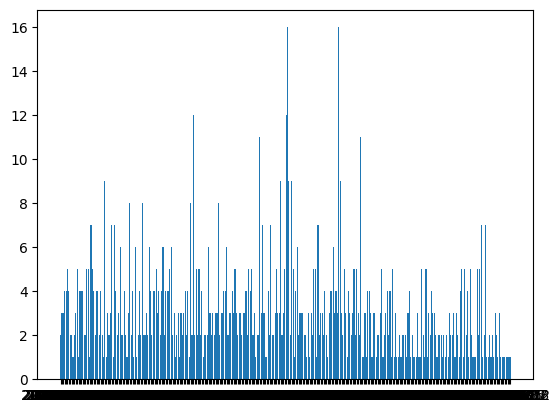

In [77]:
from matplotlib import pyplot as plt
from collections import Counter
result = Counter(df['Date'])
plt.bar(result.keys(),result.values())
